In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("e:/presentation2.csv")
x = df.iloc[:,0:24]
y=df.iloc[:,-1]
target=y

In [3]:
x=scale(x)
len(x)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


25

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [5]:
from sklearn.svm import SVC
model=SVC(C=180,kernel='linear',probability=True)
model.fit(x,y)

SVC(C=180, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.70)

In [7]:
model.score(x_test,y_test)

0.9444444444444444

In [8]:
y_pred=model.predict(x_test)
y_pred

array([3, 1, 3, 3, 1, 4, 4, 4, 2, 4, 2, 4, 3, 2, 1, 4, 4, 1], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9444444444444444

In [10]:
model.predict_proba(x_test)

array([[0.11742242, 0.11100228, 0.70144382, 0.07013148],
       [0.42052297, 0.38602503, 0.14253778, 0.05091423],
       [0.21370613, 0.17165468, 0.55457621, 0.06006298],
       [0.12962202, 0.11912368, 0.68345821, 0.06779609],
       [0.41663632, 0.36015638, 0.17026709, 0.05294021],
       [0.04749198, 0.04054038, 0.09896327, 0.81300437],
       [0.0720654 , 0.05937899, 0.20603178, 0.66252383],
       [0.03581457, 0.03140528, 0.06438724, 0.8683929 ],
       [0.40355592, 0.54166296, 0.02664642, 0.0281347 ],
       [0.04217933, 0.03640864, 0.08233666, 0.83907537],
       [0.37072279, 0.6063647 , 0.00642161, 0.0164909 ],
       [0.04375914, 0.03764103, 0.08711521, 0.83148463],
       [0.0552106 , 0.06100214, 0.76092131, 0.12286594],
       [0.40624214, 0.53355289, 0.03056787, 0.02963709],
       [0.38415308, 0.3020476 , 0.25769333, 0.05610599],
       [0.04749198, 0.04054038, 0.09896327, 0.81300437],
       [0.03209971, 0.02845148, 0.05481195, 0.88463685],
       [0.422139  , 0.44815323,

In [11]:
y_pred

array([3, 1, 3, 3, 1, 4, 4, 4, 2, 4, 2, 4, 3, 2, 1, 4, 4, 1], dtype=int64)

In [12]:
y_test

22    3
16    2
6     3
5     3
2     1
13    4
11    4
0     4
19    2
3     4
24    2
10    4
9     3
12    2
18    1
7     4
14    4
1     1
Name: 3, dtype: int64

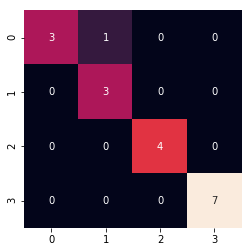

In [13]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#plt.xlabel('true label')
#plt.ylabel('predicted label');

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7

   micro avg       0.94      0.94      0.94        18
   macro avg       0.94      0.94      0.93        18
weighted avg       0.96      0.94      0.94        18



In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)# cv=no of splits


print("Accuracy(using Cross validation): %.2f%%" % (scores.mean()*100.0)) 

Accuracy(using Cross validation): 97.14%


In [61]:
scores

array([0.57142857, 0.66666667, 0.75      , 0.75      , 0.5       ])